In [8]:
import os
import git
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

ROOT_DIR =  Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
SAVE_FIGS = True

os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
from reporting import *
plots_path = os.path.join(ROOT_DIR, "publication", "paper", "final_plots",)
save_path_with_hull = Path(os.path.join(ROOT_DIR, 'publication', 'paper', 'CSVs', 'final_results_with_hull.pickle'))
main_df = pd.read_pickle(save_path_with_hull)
RERUN = False
np.random.seed(0)
FONTSIZE = 20

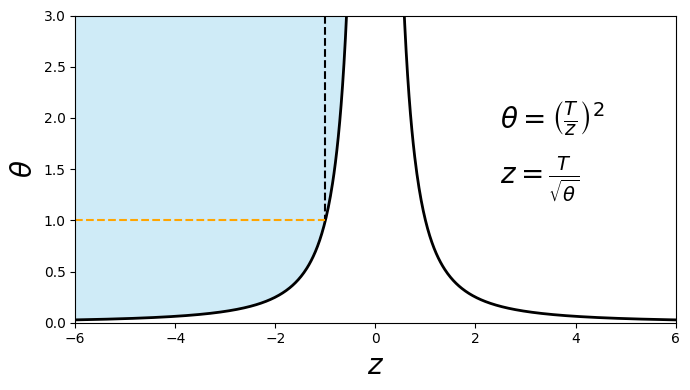

In [28]:
# Define z ranges for both branches (avoid singularity at z=0)
z_left = np.linspace(-6, -0.3, 400)
z_right = np.linspace(0.3, 6, 400)

theta_left = 1 / (z_left**2)
theta_right = 1 / (z_right**2)

fig, ax = plt.subplots(figsize=(7,4))

# Plot both branches
ax.plot(z_left, theta_left, 'k', lw=2)
ax.plot(z_right, theta_right, 'k', lw=2)

# Shade ABOVE the left branch
theta_max = 3.0  # cap for vertical axis
ax.fill_between(z_left, theta_left, theta_max, 
                color='skyblue', alpha=0.4)

# Vertical dashed lines at z = ±1
#ax.axvline(1, ymin=0, ymax=1/3, color='k', ls='--')
ax.axvline(-1, ymin=1, ymax=1/3, color='black', ls='--')
# Horizontal dashed line at theta = 1, only between z = -6 and z = -1
ax.hlines(1, xmin=-6, xmax=-1, color='orange', ls='--')
# Labels
# Labels on curve (placed on the right branch)
ax.text(2.5, 1.35, r"$z = \frac{T}{\sqrt{\theta}}$", fontsize=FONTSIZE)
ax.text(2.5, 1.9,  r"$\theta = \left(\frac{T}{z}\right)^2$", fontsize=FONTSIZE)


# Axis labels and limits
ax.set_xlabel(r"$z$", fontsize=FONTSIZE)
ax.set_ylabel(r"$\theta$", fontsize=FONTSIZE)
ax.set_ylim(0, theta_max)
ax.set_xlim(-6, 6)

plt.tight_layout()
plt.show()
if SAVE_FIGS:
    fig.savefig(os.path.join(plots_path, 'integration_space_map.jpg'), dpi=DPI)
